In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# heart 데이터 CSV 파일 경로 설정
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/heart.csv"
df = pd.read_csv(url)

# 데이터프레임 확인
display(df.head())
print("컬럼 목록:", df.columns)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


컬럼 목록: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [38]:
# 결측치 확인
print(df.isnull().sum(),"\n")

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64 



In [39]:
# 레이블의 데이터 비율을 확인(imbalanced data인지 확인)
print(df['target'].value_counts(),"\n")

target
1    165
0    138
Name: count, dtype: int64 



# 원-핫 인코딩

In [41]:
y = df['target']   # 레이블(Label) 데이터
Y = pd.get_dummies(y).values
Y

array([[False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [Fal

# Numpy 변환

In [42]:
X = df.drop('target', axis=1).values  # 특성(Feature) 데이터

# Data split & shape 확인

In [43]:
# x/y데이터. train/test 데이터 분리 (학습 80%, 테스트 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# shape 출력(인스턴스의 개수, 특성의 개수)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((242, 13), (242, 2), (61, 13), (61, 2))

# Sequential 모델 생성

In [46]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(13,input_shape=(13,),activation='relu')) # input_shape 숫자를 컬럼의 개수와 맞추지 않으면 오류 발생
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(2, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['mse'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 13)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 20)                  │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 2)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 924 (3.61 KB)

 Trainable params: 924 (3.61 KB)

 Non-trainable params: 0 (0.00 B)

# 모델에 fit

In [58]:
N_EPOCHS = 30

# validation data에 Y_test를 넣어서 train하면 안됨
model_history=model.fit(x=X_train, y=Y_train, epochs=N_EPOCHS, batch_size=32,validation_split=0.1)
Y_pred = model.predict(X_test)

# one-hot encoding 데이터를 정수 라벨로 변환
Y_test_class = np.argmax(Y_test, axis=1)
Y_pred_class = np.argmax(Y_pred, axis=1)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4525 - mse: 0.1462 - val_loss: 0.3804 - val_mse: 0.1151
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4876 - mse: 0.1632 - val_loss: 0.3914 - val_mse: 0.1195
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4399 - mse: 0.1420 - val_loss: 0.3809 - val_mse: 0.1161
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4827 - mse: 0.1587 - val_loss: 0.4079 - val_mse: 0.1264
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4227 - mse: 0.1357 - val_loss: 0.3815 - val_mse: 0.1163
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4393 - mse: 0.1430 - val_loss: 0.3925 - val_mse: 0.1209
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4924 - mse: 0.1638 - val_loss: 0.3841 - val_mse: 0.1180
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4309 - mse: 0.1368 - val_loss: 0.3866 - val_mse: 0.1190
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4400 - mse: 0.1407 - 

# loss 체크

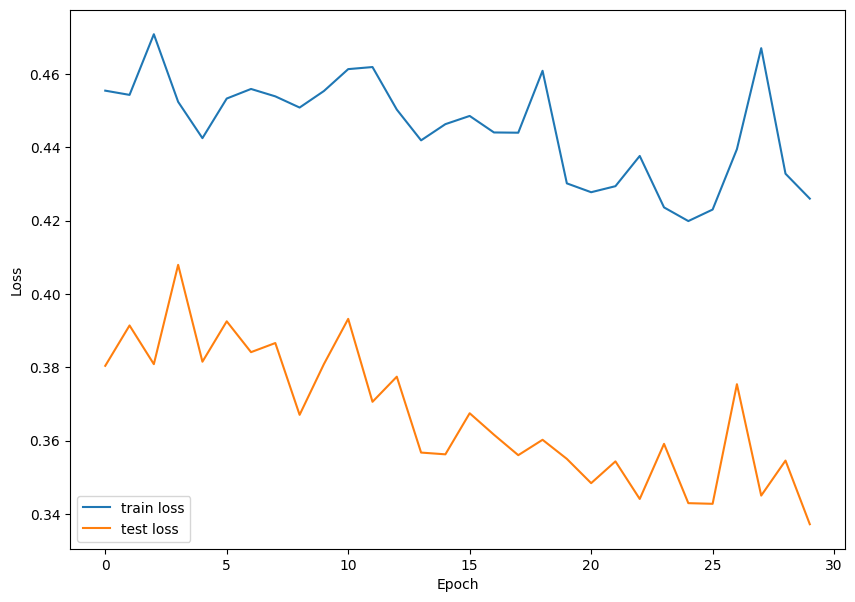

In [59]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), model_history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), model_history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 평가

In [35]:
model.evaluate(X_test, Y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.5700 - mse: 0.1871


[0.550715982913971, 0.18154431879520416]